In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tesla=pd.read_csv('Tesla.csv',parse_dates=True)

In [6]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [7]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [0]:
data=tesla[['Date','Close']]

In [9]:
data.head(5)

,Date,Close
0,6/29/2010,23.889999
1,6/30/2010,23.830000
2,7/1/2010,21.959999
3,7/2/2010,19.200001
4,7/6/2010,16.110001


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1692 non-null   object 
 1   Close   1692 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.6+ KB


In [11]:
data['Date']=pd.to_datetime(data['Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1692 non-null   datetime64[ns]
 1   Close   1692 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.6 KB


In [0]:
data=data.set_index('Date')

In [14]:
data.head(5)

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [15]:
data.tail()

,Close
Date,
2017-03-13,246.169998
2017-03-14,258.000000
2017-03-15,255.729996
2017-03-16,262.049988
2017-03-17,261.500000


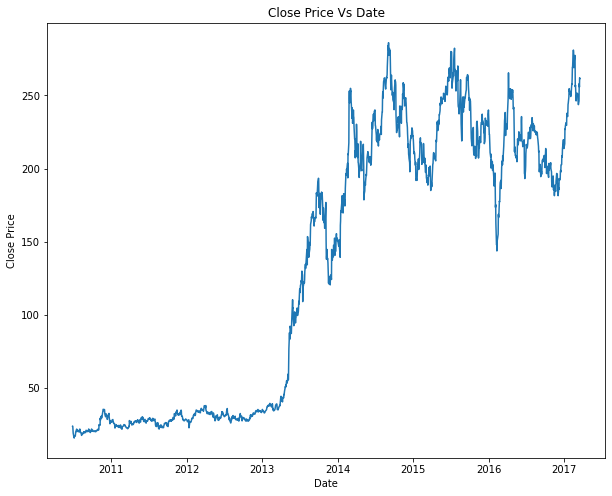

In [16]:
plt.figure(figsize=[10,8])                                  
plt.plot(data['Close'])                                
plt.xlabel("Date")                                        
plt.ylabel("Close Price")                                  
plt.title("Close Price Vs Date")                           
plt.show()

In [17]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler   
mm=MinMaxScaler()

Using TensorFlow backend.


In [18]:
len(data)

1692

In [19]:
train=data[:-30]
test=data[-30:]
train.shape
test.shape

(30, 1)

In [20]:
train.shape

(1662, 1)

In [24]:
train.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [21]:
train.head(5)

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [25]:
test.tail()

,Close
Date,
2017-03-13,246.169998
2017-03-14,258.000000
2017-03-15,255.729996
2017-03-16,262.049988
2017-03-17,261.500000


In [0]:
t_train=mm.fit_transform(train)

In [0]:
x_train=t_train[:len(t_train)-1]
y_train=t_train[1:len(t_train)]

In [29]:
len(x_train)

1661

In [30]:
len(y_train)

1661

In [0]:
x_train = np.reshape(x_train, (len(x_train), 1, 1)) 

In [0]:
model=Sequential()
model.add(LSTM(units=10,activation='sigmoid'))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])


In [36]:
model.fit(x_train,y_train,batch_size=20,epochs=6,validation_split=0.2)

Train on 1328 samples, validate on 333 samples
Epoch 1/6
1328/1328 [==============================] - 0s 105us/step - loss: 3.6530e-04 - accuracy: 0.0015 - val_loss: 3.9637e-04 - val_accuracy: 0.0000e+00
Epoch 2/6
1328/1328 [==============================] - 0s 102us/step - loss: 2.9460e-04 - accuracy: 0.0015 - val_loss: 3.7505e-04 - val_accuracy: 0.0000e+00
Epoch 3/6
1328/1328 [==============================] - 0s 98us/step - loss: 2.6063e-04 - accuracy: 0.0015 - val_loss: 3.6202e-04 - val_accuracy: 0.0000e+00
Epoch 4/6
1328/1328 [==============================] - 0s 97us/step - loss: 2.4793e-04 - accuracy: 0.0015 - val_loss: 3.6517e-04 - val_accuracy: 0.0000e+00
Epoch 5/6
1328/1328 [==============================] - 0s 96us/step - loss: 2.3935e-04 - accuracy: 0.0015 - val_loss: 3.5265e-04 - val_accuracy: 0.0000e+00
Epoch 6/6
1328/1328 [==============================] - 0s 99us/step - loss: 2.3595e-04 - accuracy: 0.0015 - val_loss: 3.5166e-04 - val_accuracy: 0.0000e+00


In [0]:
test=test.values
inputs = np.reshape(test, (len(test), 1))                
inputs = mm.transform(inputs)                                
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_price = model.predict(inputs)

In [0]:
predicted=mm.inverse_transform(predicted_price)

In [39]:
predicted

array([[250.07243],
       [256.17557],
       [255.90149],
       [260.24164],
       [266.92517],
       [266.95322],
       [277.53586],
       [277.88757],
       [276.75793],
       [266.6912 ],
       [269.75638],
       [274.55963],
       [270.95007],
       [254.49202],
       [255.44759],
       [245.21625],
       [248.79839],
       [248.82692],
       [249.2644 ],
       [250.30045],
       [249.95839],
       [247.46587],
       [245.82674],
       [243.9466 ],
       [242.79036],
       [245.15901],
       [256.39297],
       [254.24586],
       [260.2134 ],
       [259.6954 ]], dtype=float32)

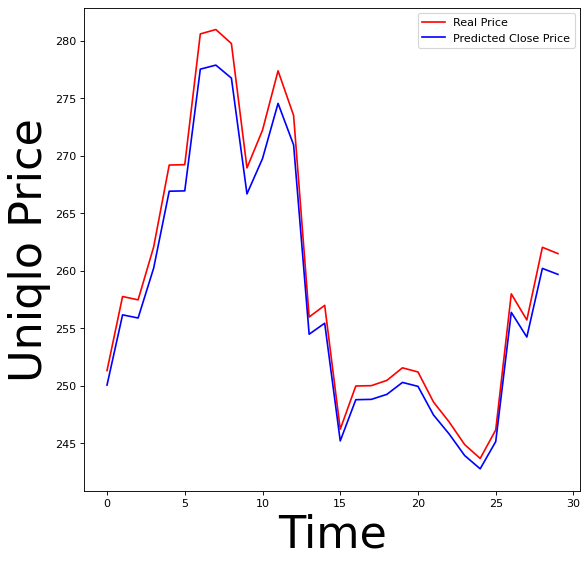

In [40]:
plt.figure(figsize=(8, 8), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test[:, 0], color='red', label='Real Price')                     
plt.plot(predicted[:, 0], color = 'blue', label = 'Predicted Close Price')      

plt.xlabel('Time', fontsize=40)
plt.ylabel('Uniqlo Price', fontsize = 40)
plt.legend(loc = 'best')
plt.show()

In [0]:
from sklearn.metrics import accuracy_score


In [0]:
error=predicted-test

In [43]:
error

array([[-1.25756853],
       [-1.59442137],
       [-1.57852174],
       [-1.83834882],
       [-2.2748411 ],
       [-2.27679445],
       [-3.06414785],
       [-3.09243776],
       [-3.00207543],
       [-2.25881937],
       [-2.47363283],
       [-2.83038365],
       [-2.55993676],
       [-1.49798535],
       [-1.55241394],
       [-1.01374844],
       [-1.19161938],
       [-1.19308444],
       [-1.2155917 ],
       [-1.26956144],
       [-1.25161772],
       [-1.12412991],
       [-1.04325855],
       [-0.95339976],
       [-0.8996425 ],
       [-1.01098616],
       [-1.60702515],
       [-1.48413113],
       [-1.83657858],
       [-1.80459595]])